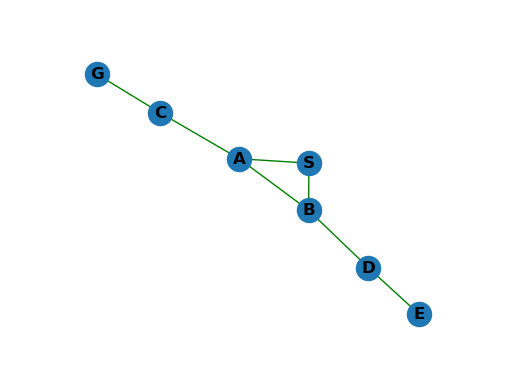

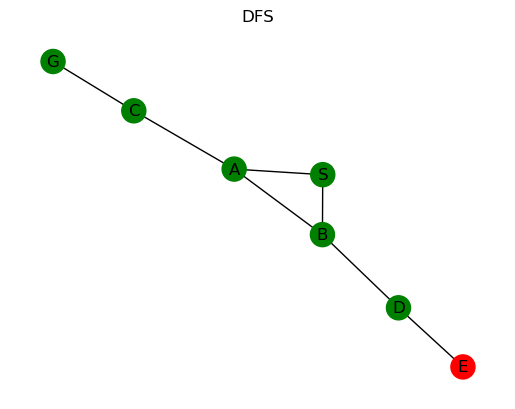

In [17]:
import tkinter as tk
from tkinter import ttk, Entry, Button, Label, Canvas
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import networkx as nx
import numpy as np
import random
import queue
import time

seed=0
random.seed(seed)
np.random.seed(seed)

class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append(v)
        
    def display_graph():
        # Create a figure and axis
        fig, ax = plt.subplots()

        nx.draw(G, pos, with_labels=True, font_weight='bold', edge_color="green", ax=ax)
        plt.margins(0.2)

        # Display the plot
        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.grid(row=0, column=1, rowspan=20)
        canvas.draw()

    def visualize_search(order, title, G, pos, delay=500):
        fig, ax = plt.subplots()
        plt.title(title)
        canvas = FigureCanvasTkAgg(fig, master=window)
        canvas_widget = canvas.get_tk_widget()
        canvas_widget.grid(row=0, column=1, rowspan=20)
        canvas.draw()

        def update_graph(i, order):
            plt.clf()
            plt.title(title)
            node = order[i]
            nx.draw(G, pos, with_labels=True, node_color=['r' if n == node else 'g' for n in G.nodes])
            canvas.draw()
            if i < len(order) - 1:
                window.after(delay, update_graph, i + 1, order)

        update_graph(0, order)
        
def dfs(graph, start_node, visited=None):
    if visited is None:
        visited = set()
    
    order = []
    
    if start_node not in visited:
        order.append(start_node)
        visited.add(start_node)
        for node in graph[start_node]:
            if node not in visited:
                order.extend(dfs(graph, node, visited))
    
    return order

def bfs(graph, start_node): 
    visited = set()
    q = queue.Queue()
    q.put(start_node)
    order = []
    
    while not q.empty():
        vertex = q.get()
        if vertex not in visited:
            order.append(vertex)
            visited.add(vertex)
            for node in graph[vertex]:
                if node not in visited:
                    q.put(node)
    return order



def depth():
    Graph.visualize_search(dfs(G,'S'), 'DFS', G, pos)
def breadth():
    Graph.visualize_search(bfs(G,'S'), 'BFS', G, pos)


if __name__ == "__main__":
    G=nx.Graph()

    G.add_edge("S", "A")
    G.add_edge("A", "C")
    G.add_edge("B", "A")
    G.add_edge("S", "B")
    G.add_edge("B", "D")
    G.add_edge("D", "E")
    G.add_edge("C", "G")
    
    pos = nx.spring_layout(G)
        
# Create the main window
window = tk.Tk()
window.title("NetworkX in Tkinter Example")

# Create a button to trigger the display of the graph
graph_button = ttk.Button(window, text="Display Graph", command=Graph.display_graph)
graph_button.grid(row=0, column=0, columnspan=1)
graph_button = ttk.Button(window, text="DFS", command=depth)
graph_button.grid(row=1, column=0, columnspan=1)
graph_button = ttk.Button(window, text="BFS", command=breadth)
graph_button.grid(row=2, column=0, columnspan=1)





# Run the GUI application
window.mainloop()

In [20]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, start, end):
        if start not in self.graph:
            self.graph[start] = []
        self.graph[start].append(end)

def dfs(graph, start, end, visited=None, path=None):
    if visited is None:
        visited = set()
    if path is None:
        path = []

    visited.add(start)
    path.append(start)

    if start == end:
        print("Path found:", path)
        return path

    for neighbor in graph.get(start, []):
        if neighbor not in visited:
            dfs(graph, neighbor, end, visited, path)

    path.pop()  # Backtrack if the current path did not lead to the end node
    return None

# Example usage:
g = Graph()
g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('B', 'D')
g.add_edge('B', 'E')
g.add_edge('C', 'F')
g.add_edge('E', 'F')

start_node = 'A'
end_node = 'N'
result = dfs(g.graph, start_node, end_node)

if result:
    print(f"DFS path from {start_node} to {end_node}: {result}")
else:
    print(f"No path found from {start_node} to {end_node}")


No path found from A to N


In [21]:
import tkinter as tk
from collections import deque
import time

class WeightedGraph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, node, neighbor, weight):
        if node not in self.graph:
            self.graph[node] = {}
        if neighbor not in self.graph:
            self.graph[neighbor] = {}

        self.graph[node][neighbor] = weight
        self.graph[neighbor][node] = weight

graph = WeightedGraph()
graph.add_edge('A', 'B', 2)
graph.add_edge('A', 'C', 3)
graph.add_edge('A', 'D', 4)
graph.add_edge('B', 'C', 2)
graph.add_edge('B', 'D', 1)
graph.add_edge('B', 'E', 4)
graph.add_edge('C', 'F', 5)
graph.add_edge('D', 'G', 2)
graph.add_edge('D', 'H', 3)
graph.add_edge('E', 'I', 1)
graph.add_edge('E', 'F', 3)
graph.add_edge('F', 'J', 4)
graph.add_edge('G', 'K', 2)
graph.add_edge('H', 'L', 3)
graph.add_edge('I', 'M', 5)
graph.add_edge('J', 'N', 1)
graph.add_edge('K', 'O', 3)


class PathSearchingApp:
    def __init__(self, master):
        self.master = master
        self.target_found = False
        master.title("Path Searching Visualization")

        self.heading_label = tk.Label(master, text="Path Searching Visualization", bg="blue", fg="white",
                                      font=("Arial", 20, "bold", "italic"))
        self.heading_label.pack()

        self.start_node_label = tk.Label(master, text="Start Node:")
        self.start_node_label.pack()

        self.start_node_entry = tk.Entry(master)
        self.start_node_entry.pack()

        self.search_node_label = tk.Label(master, text="Search Node:")
        self.search_node_label.pack()

        self.search_node_entry = tk.Entry(master)
        self.search_node_entry.pack()

        self.canvas = tk.Canvas(master, width=800, height=400, bg="orange")
        self.canvas.pack()

        self.status_label = tk.Label(master, text="")
        self.status_label.pack()

        self.bfs_button = tk.Button(master, text="BFS", command=self.bfs_button_clicked)
        self.bfs_button.pack(side=tk.LEFT, padx=10)

        self.dfs_button = tk.Button(master, text="DFS", command=self.dfs_button_clicked)
        self.dfs_button.pack(side=tk.LEFT)

        self.hill_climbing_button = tk.Button(master, text="Hill Climbing", command=self.hill_climbing_button_clicked)
        self.hill_climbing_button.pack(side=tk.LEFT)
        
        self.beam_search_button = tk.Button(master, text="Beam Search", command=self.beam_search_button_clicked)
        self.beam_search_button.pack(side=tk.LEFT)


        self.vertices = {'A': (200, 50), 'B': (400, 150), 'C': (600, 50),
                         'D': (200, 150), 'E': (400, 250), 'F': (600, 150),
                         'G': (200, 250), 'H': (300, 200), 'I': (600, 250),
                         'J': (700, 150), 'K': (200, 350), 'L': (400, 350),
                         'M': (600, 350), 'N': (700, 350), 'O': (300, 300)}

        self.speed_var = tk.DoubleVar()  # Variable to store simulation speed
        self.speed_scale = tk.Scale(master, from_=0.1, to=2.0, orient=tk.HORIZONTAL, resolution=0.1,
                                    label="Simulation Speed", variable=self.speed_var)
        self.speed_scale.set(1.0)  # Default speed
        self.speed_scale.pack()

        self.pause_var = tk.BooleanVar()  # Variable to store pause/play state
        self.pause_button = tk.Button(master, text="Pause", command=self.toggle_pause)
        self.pause_button.pack()

        # Draw vertices and edges
        for node, pos in self.vertices.items():
            self.draw_node(node, pos)
            for neighbor, weight in graph.graph[node].items():
                self.draw_edge(node, neighbor, weight)

        # Count parameters
        self.enqueue_count = 0
        self.queue_size = 0

        # State variables
        self.bfs_running = False
        self.dfs_running = False
        self.hill_climbing_running = False
        self.beam_search_running = False

    def draw_node(self, node, pos):
        x, y = pos
        self.canvas.create_oval(x - 20, y - 20, x + 20, y + 20, fill='white')
        self.canvas.create_text(x, y, text=node, font=("Helvetica", 14, 'bold'), fill="black")

    def draw_edge(self, node1, node2, weight):
        x1, y1 = self.vertices[node1]
        x2, y2 = self.vertices[node2]

        # Draw the line
        line = self.canvas.create_line(x1, y1, x2, y2, fill='black', width=2)

        # Calculate the midpoint for placing the text
        mid_x = (x1 + x2) / 2
        mid_y = (y1 + y2) / 2

        # Display the weight on the line
        self.canvas.create_text(mid_x, mid_y, text=str(weight), font=('Arial', 10, 'bold'))

    def update_node_color(self, node, color):
        x, y = self.vertices[node]
        self.canvas.create_oval(x - 20, y - 20, x + 20, y + 20, fill=color)
        self.canvas.create_text(x, y, text=node, font=('Arial', 14, 'bold'))

    def toggle_pause(self):
        # Toggle pause/play state
        self.pause_var.set(not self.pause_var.get())
        if self.pause_var.get():
            self.pause_button.config(text="Play")
        else:
            self.pause_button.config(text="Pause")
            if self.bfs_running:
                self.master.after(1, self.bfs_traversal)  # Resume BFS traversal
            elif self.dfs_running:
                self.master.after(1, self.dfs_traversal)  # Resume DFS traversal
            elif self.hill_climbing_running:
                self.master.after(1, self.hill_climbing)  # Resume Hill Climbing

    def reset_colors(self):
        for node in self.vertices:
            self.update_node_color(node, 'white')

    def reset_queue_size(self):
        self.enqueue_count = 0
        self.queue_size = 0

    def bfs_button_clicked(self):
        if not self.bfs_running:
            self.bfs_running = True
            self.bfs_traversal()

    def dfs_button_clicked(self):
        if not self.dfs_running:
            self.dfs_running = True
            self.dfs_traversal()

    def hill_climbing_button_clicked(self):
        if not self.hill_climbing_running:
            self.hill_climbing_running = True
            self.hill_climbing()
    
    def beam_search_button_clicked(self):
        if not self.beam_search_running:
            self.beam_search_running = True
            self.beam_search()


################################################## START BFS ALGORITHM ##################################################

    def bfs_traversal(self):
        self.reset_colors()
        self.reset_queue_size()
        start_node = self.start_node_entry.get()
        search_node = self.search_node_entry.get()
        visited = set()
        queue = deque([(start_node, 0)])  # Queue now contains both node and path cost
        visited.add(start_node)

        while queue and not self.pause_var.get():
            node, path_cost = queue.popleft()
            self.update_node_color(node, 'green')  # Mark as visited
            self.status_label.config(text=f"Visiting node {node}, Path Cost: {path_cost}")
            self.master.update()
            time.sleep(1 / self.speed_var.get())  # Adjust speed
            self.enqueue_count += 1
            self.queue_size = len(queue)

            if node == search_node:
                self.status_label.config(
                    text=f"Node {search_node} found! Path Cost: {path_cost}, Enqueues: {self.enqueue_count}, Queue Size: {self.queue_size}")
                self.bfs_running = False
                return  # Stop the traversal if the node is found

            for neighbor, weight in graph.graph[node].items():
                if neighbor not in visited:
                    visited.add(neighbor)
                    queue.append((neighbor, path_cost + weight))

        self.status_label.config(
            text=f"All nodes visited. Enqueues: {self.enqueue_count}, Queue Size: {self.queue_size}")
        self.bfs_running = False


################################################## END BFS ALGORITHM ##################################################




################################################## START DFS ALGORITHM ##################################################

    def dfs_util(self, node, search_node, visited, path_cost):
        if self.target_found:  # Check if the target node is already found
            return

        visited.add(node)
        self.update_node_color(node, 'green')  # if visited, mark green
        self.status_label.config(text=f"Visiting node {node}, Path Cost: {path_cost}")
        self.master.update()
        time.sleep(1 / self.speed_var.get())  # Pause for visualization

        if node == search_node:
            self.status_label.config(
                text=f"Node {search_node} found! Path Cost: {path_cost}, Enqueues: {self.enqueue_count}, Queue Size: {self.queue_size}")
            self.target_found = True  # to stop further traversal, set flag to true
            return  # Stop the traversal if the node is found

        for neighbor, weight in graph.graph[node].items():
            if neighbor not in visited and not self.pause_var.get():  # Check if paused
                self.dfs_util(neighbor, search_node, visited, path_cost + weight)

    def reset_target_found(self):
        self.target_found = False

    # Modify the beginning of dfs_traversal method
    def dfs_traversal(self):
        self.reset_colors()
        self.reset_queue_size()
        self.reset_target_found()  # Reset the target_found variable
        start_node = self.start_node_entry.get()
        search_node = self.search_node_entry.get()
        visited = set()

        # Pass 0 as the initial path cost
        self.dfs_util(start_node, search_node, visited, 0)

        if not self.target_found:
            self.status_label.config(
                text=f"All nodes are already visited and Node {search_node} is not found")
        self.dfs_running = False

################################################## END DFS ALGORITHM ################################################## 



################################################## START HILL CLIMBING ALGORITHM ##################################################
    def hill_climbing(self):
        self.reset_colors()
        self.reset_queue_size()
        start_node = self.start_node_entry.get()
        search_node = self.search_node_entry.get()
        current_node = start_node
        total_cost = 0
        visited = set([start_node])

        while current_node != search_node and not self.pause_var.get():
            neighbors = [(neighbor, weight) for neighbor, weight in graph.graph[current_node].items() if neighbor not in visited]
            if not neighbors:
                break  # No unvisited neighbors, stop climbing

            # Choose the neighbor with the highest weight (assuming maximization problem)
            next_node, weight = min(neighbors, key=lambda x: x[1])

            total_cost += weight  # Accumulate the total cost
            self.update_node_color(current_node, 'green')  # Mark as visited
            self.draw_edge(current_node, next_node, weight)
            self.status_label.config(text=f"Moving from {current_node} to {next_node}, Total Cost: {total_cost}")
            self.master.update()
            time.sleep(1 / self.speed_var.get())  # Adjust speed

            visited.add(next_node)
            current_node = next_node
        
        self.update_node_color(current_node, 'green')
        if current_node == search_node:
            self.status_label.config(
                text=f"Node {search_node} found! Total Cost: {total_cost}")
        else:
            self.status_label.config(
                text=f"Hill climbing stopped. Total Cost until dead end or local maximum: {total_cost}")

        self.hill_climbing_running = False

################################################## END HILL CLIMBING ALGORITHM ##################################################


################################################## START BEAM SEARCH ##################################################

    def beam_search(self):
        self.reset_colors()
        self.reset_queue_size()
        start_node = self.start_node_entry.get()
        search_node = self.search_node_entry.get()
        beam_width = 2  # You can adjust this value as needed
        visited = set([start_node])
        beam = [(start_node, 0)]  # Each beam item is a tuple (node, total_cost)

        while beam and not self.pause_var.get():
            next_beam = []
            for current_node, total_cost in beam:
                neighbors = [(neighbor, weight) for neighbor, weight in graph.graph[current_node].items() if neighbor not in visited]
                for neighbor, weight in neighbors:
                    total_cost += weight  # Accumulate the total cost
                    next_beam.append((neighbor, total_cost))

            # Select the top-k items from the next beam
            next_beam = sorted(next_beam, key=lambda x: x[1])[:beam_width]

            for current_node, total_cost in next_beam:
                self.update_node_color(current_node, 'green')  # Mark as visited
                self.status_label.config(text=f"Visiting node {current_node}, Total Cost: {total_cost}")
                self.master.update()
                time.sleep(1 / self.speed_var.get())  # Adjust speed
                visited.add(current_node)

                if current_node == search_node:
                    self.status_label.config(
                        text=f"Node {search_node} found! Total Cost: {total_cost}")
                    self.beam_search_running = False
                    return  # Stop the search if the node is found

            beam = next_beam

        self.status_label.config(
            text=f"Beam search stopped. Total Cost until dead end or local maximum.")
        self.beam_search_running = False

################################################## END BEAM SEARCH ##################################################


root = tk.Tk()
app = PathSearchingApp(root)
root.mainloop()